### Hypothesis: All factors contribute to purchasing of new vehicles from the manufacturer - Baseline Model.
Experiment: Perform a regression analysis to determine if there is a correlation between the variables given related to the vehicle purchased and the likelihood of purchasing a new vehicle.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
car_repurchase = pd.read_csv("../repurchase_training.csv")

In [2]:
# printing the number of rows and columns in the dataset
car_repurchase.shape

(131337, 17)

In [3]:
# Print 10 samples from the data 
car_repurchase.sample(10)

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
62483,73378,0,NaN,Male,model_13,Large/SUV,5,4,10,3,7,5,9,8,6,9,4
114303,134177,0,NaN,NaN,model_11,Small/Medium,2,2,3,1,2,2,2,2,2,1,3
49976,58718,0,NaN,NaN,model_3,Large/SUV,3,1,9,3,10,10,6,6,8,2,1
4262,4986,0,NaN,Female,model_2,Small/Medium,8,9,5,9,8,9,7,6,9,9,7
25830,30344,0,NaN,NaN,model_2,Small/Medium,1,2,2,2,2,2,1,1,2,2,2
33612,39485,0,NaN,NaN,model_5,Large/SUV,5,6,8,7,9,8,7,5,8,10,8
44315,52083,0,NaN,NaN,model_4,Small/Medium,5,2,1,1,2,2,2,1,2,2,2
94841,111333,0,NaN,NaN,model_5,Large/SUV,8,7,2,8,2,5,4,9,6,10,1
95359,111949,0,3. 35 to 44,Female,model_4,Small/Medium,8,8,9,9,8,8,8,8,7,5,9
116225,136394,0,NaN,Male,model_2,Small/Medium,7,8,7,9,6,7,7,8,5,5,9


In [4]:
# Check data types
car_repurchase.dtypes

ID                            int64
Target                        int64
age_band                     object
gender                       object
car_model                    object
car_segment                  object
age_of_vehicle_years          int64
sched_serv_warr               int64
non_sched_serv_warr           int64
sched_serv_paid               int64
non_sched_serv_paid           int64
total_paid_services           int64
total_services                int64
mth_since_last_serv           int64
annualised_mileage            int64
num_dealers_visited           int64
num_serv_dealer_purchased     int64
dtype: object

In [5]:
# Check for missing values
car_repurchase.isnull().sum()

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

<b>"age_band" (accounts for more than 85% of missing variables) and "gender" (accounts for more than 52%) are the only columns that have a very large number of null values.  It is better if we remove them as replacing age_band with mode is not a good practice and gender is not important if we see both genders as valuable customers. </b>

In [6]:
# removing redundant columns
car_repurchase = car_repurchase.drop(columns=["ID", "age_band", "gender"])

In [7]:
# saving the data to csv file to use it in next experiment
car_repurchase.to_csv('../datasets/car_repur_clean1.csv', index=False)

<Axes: xlabel='Target', ylabel='count'>

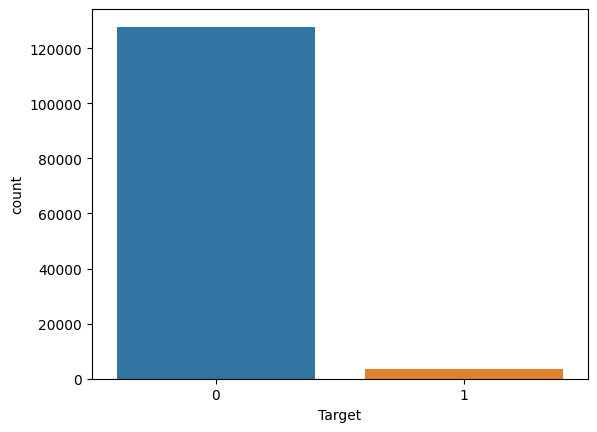

In [8]:
# Distribution of target variable
sns.countplot(x='Target', data=car_repurchase)

In [9]:
# Count the number of target value
car_repurchase['Target'].value_counts()

0    127816
1      3521
Name: Target, dtype: int64

### <b>Only 2.7% of all consumers are those who have repurchased vehicles. This shows us that the dataset is imbalanced and we need to sample it accordingly for our experiments.</b>

### Baseline Model training - Logistic Regression

In [10]:
# Import sklearn packages to preprocess data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Encoding the categorical variables to numeric
le = LabelEncoder()

car_repurchase['car_model'] = le.fit_transform(car_repurchase['car_model'])
car_repurchase['car_segment'] = le.fit_transform(car_repurchase['car_segment'])

# Defining X and y from the data - dependent, independent variables
X = car_repurchase.iloc[:,1:14]
y = car_repurchase.iloc[:,0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.25, stratify=y,
                                    random_state=23, shuffle=True)

# select the numeric data to further scale it in 0-1
num_data = car_repurchase.select_dtypes(include=np.number) 
# pop the target variable to plot each variable against it 
target = num_data.pop("Target")
num_cols = num_data.columns.tolist()

# Scale the numeric columns by standard scaler
scaler = StandardScaler()
X_train[num_cols] =  scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [11]:
print(X_train.shape, X_test.shape)

(98502, 13) (32835, 13)


In [12]:
#importing sklearn packages to fit logistic regression model and evaluate it
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = clf.predict(X_test)
recall = recall_score(y_test, y_pred, pos_label=1)
print(classification_report(y_test, y_pred))
print("Recall for target 1:", recall)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     31955
           1       0.81      0.20      0.32       880

    accuracy                           0.98     32835
   macro avg       0.90      0.60      0.66     32835
weighted avg       0.97      0.98      0.97     32835

Recall for target 1: 0.20113636363636364


In [13]:
# importing pickle library
import pickle
# choose the filename you want
filename = '../models/baseline_model_exp1.sav'
# dump the model
pickle.dump(clf, open(filename, 'wb'))

### Appendix

In [ ]:
# importing math and numpy libraries
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# num_data has all the nuerical columns 
num_data = car_repurchase.select_dtypes(include=np.number) 
num_cols = num_data.columns.tolist()

scaler = MinMaxScaler()
num_data_scaled = num_data

# fit and transform the selected columns
num_data_scaled[num_cols] = scaler.fit_transform(num_data_scaled[num_cols])

# fix axes to subplot the scatter plots
fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))

# pop the target variable to plot each variable against it 
target = num_data_scaled.pop("Target")

#loop through each column and plot the scatter plot
for index, cols in enumerate(num_data_scaled.columns.values):
    sns.scatterplot(data = num_data_scaled,  y = target , x = cols ,hue = target, ax = ax[math.floor(index/3)][index%3])
plt.show()